In [83]:
import sys
print (sys.version)

3.7.1 (v3.7.1:260ec2c36a, Oct 20 2018, 14:57:15) [MSC v.1915 64 bit (AMD64)]


In [128]:
from pandas_datareader import data as pdr
import yfinance as yf
import datetime
yf.pdr_override() 

stocks = ["AMZN"]
start = datetime.datetime(2018,5,31)
end = datetime.datetime(2019,3,1)

f = pdr.get_data_yahoo(stocks, start=start, end=end)
print (f)

[*********************100%***********************]  1 of 1 downloaded
               Open     High      Low    Close  Adj Close   Volume
Date                                                              
2018-05-30  1618.10  1626.00  1612.93  1624.89    1624.89  2907400
2018-05-31  1623.00  1635.00  1621.35  1629.62    1629.62  3166300
2018-06-01  1637.03  1646.73  1635.09  1641.54    1641.54  3313400
2018-06-04  1648.90  1665.68  1645.49  1665.27    1665.27  3187700
2018-06-05  1672.99  1699.00  1670.06  1696.35    1696.35  4782200
...             ...      ...      ...      ...        ...      ...
2019-02-22  1623.50  1634.94  1621.17  1631.56    1631.56  3096200
2019-02-25  1641.45  1654.60  1630.39  1633.00    1633.00  3184500
2019-02-26  1625.98  1639.99  1616.13  1636.40    1636.40  2665800
2019-02-27  1628.18  1641.81  1615.10  1641.09    1641.09  3148800
2019-02-28  1635.25  1651.77  1633.83  1639.83    1639.83  3025900

[189 rows x 6 columns]


In [116]:
import pandas
f.to_csv('F://AMZ1.csv')
print (f)

               Open     High      Low    Close  Adj Close   Volume
Date                                                              
2018-05-30  1618.10  1626.00  1612.93  1624.89    1624.89  2907400
2018-05-31  1623.00  1635.00  1621.35  1629.62    1629.62  3166300
2018-06-01  1637.03  1646.73  1635.09  1641.54    1641.54  3313400
2018-06-04  1648.90  1665.68  1645.49  1665.27    1665.27  3187700
2018-06-05  1672.99  1699.00  1670.06  1696.35    1696.35  4782200
...             ...      ...      ...      ...        ...      ...
2019-02-22  1623.50  1634.94  1621.17  1631.56    1631.56  3096200
2019-02-25  1641.45  1654.60  1630.39  1633.00    1633.00  3184500
2019-02-26  1625.98  1639.99  1616.13  1636.40    1636.40  2665800
2019-02-27  1628.18  1641.81  1615.10  1641.09    1641.09  3148800
2019-02-28  1635.25  1651.77  1633.83  1639.83    1639.83  3025900

[189 rows x 6 columns]


In [86]:
import pandas as pd
import numpy as np

data = pd.read_csv('F://AMZ1.csv')
#print(data.head())

print("\n")
print("Open   --- mean :", np.mean(data['Open']),  "  \t Std: ", np.std(data['Open']),  "  \t Max: ", np.max(data['Open']),  "  \t Min: ", np.min(data['Open']))
print("High   --- mean :", np.mean(data['High']),  "  \t Std: ", np.std(data['High']),  "  \t Max: ", np.max(data['High']),  "  \t Min: ", np.min(data['High']))
print("Low    --- mean :", np.mean(data['Low']),   "  \t Std: ", np.std(data['Low']),   "  \t Max: ", np.max(data['Low']),   "  \t Min: ", np.min(data['Low']))
print("Close  --- mean :", np.mean(data['Close']), "  \t Std: ", np.std(data['Close']), "  \t Max: ", np.max(data['Close']), "  \t Min: ", np.min(data['Close']))
print("Volume --- mean :", np.mean(data['Volume']),"  \t Std: ", np.std(data['Volume']),"  \t Max: ", np.max(data['Volume']),"  \t Min: ", np.min(data['Volume']))



Open   --- mean : 1734.849523809524   	 Std:  146.4654677226785   	 Max:  2038.11   	 Min:  1346.0
High   --- mean : 1755.351693121693   	 Std:  141.24133714987502   	 Max:  2050.5   	 Min:  1396.03
Low    --- mean : 1709.9180952380952   	 Std:  148.58456424481523   	 Max:  2013.0   	 Min:  1307.0
Close  --- mean : 1732.8989947089942   	 Std:  144.53743800380465   	 Max:  2039.51   	 Min:  1343.96
Volume --- mean : 5676293.650793651   	 Std:  2453839.190873901   	 Max:  14963800   	 Min:  2177300


In [117]:
import pandas as pd 
import numpy as np
import matplotlib 
import cufflinks as cf
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from matplotlib import style
from pandas import DatetimeIndex

%matplotlib inline

In [118]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.style.use('seaborn-whitegrid')
matplotlib.rc('xtick', labelsize=11) 
matplotlib.rc('ytick', labelsize=11)
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')

df = pd.read_csv('F://AMZ1.csv',index_col=False)
ticker='AMZN'

In [119]:
init_notebook_mode(connected=True)
cf.go_offline()
subdf = df[:]
subdf[['Open', 'High', 'Low', 'Close']].iplot(kind='candle', 
                                           up_color='#9900cc', 
                                           down_color='#00ffcc', 
                                           theme='solar', 
                                           title='Candlesticks for Intraday Prices of {ticker}'.format(ticker=ticker), 
                                           xTitle='Day')

In [120]:
from datetime import datetime
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data as pdr
# Define the instruments to download. We would like to see Amazon, Facebook and the Google index.
tickers = ["AMZN","MSFT","GOOGL"]

# We would like all available data from 01/01/2010 until 12/31/2016.
start_date = '2012-01-01'
end_date = '2018-12-31'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.get_data_yahoo(tickers, start_date, end_date)

[*********************100%***********************]  3 of 3 downloaded


In [92]:
panel_data.tail(9)

Adj Close                     Close                      High  \
                AMZN    GOOGL    MSFT     AMZN    GOOGL    MSFT     AMZN   
Date                                                                       
2018-12-17   1520.91  1025.65  101.74  1520.91  1025.65  102.89  1576.13   
2018-12-18   1551.48  1043.41  102.80  1551.48  1043.41  103.97  1567.55   
2018-12-19   1495.08  1035.46  102.53  1495.08  1035.46  103.69  1584.53   
2018-12-20   1460.83  1023.58  100.37  1460.83  1023.58  101.51  1509.50   
2018-12-21   1377.45   991.25   97.13  1377.45   991.25   98.23  1480.00   
2018-12-24   1343.96   984.67   93.07  1343.96   984.67   94.13  1396.03   
2018-12-26   1470.90  1047.85   99.43  1470.90  1047.85  100.56  1473.16   
2018-12-27   1461.64  1052.90  100.05  1461.64  1052.90  101.18  1469.00   
2018-12-28   1478.02  1046.68   99.26  1478.02  1046.68  100.39  1513.47   

                                 Low                      Open           \
              GOOGL    MSFT     AMZN    GOOGL    MSFT     AMZN    GOOGL   
Date                                                                      
2018-12-17  1062.38  105.80  1505.01  1016.63  101.71  1566.00  1047.01   
2018-12-18  1059.69  104.51  1523.01  1030.48  102.52  1540.00  1034.00   
2018-12-19  1075.71  106.88  1483.18  1019.43  101.35  1543.05  1047.29   
2018-12-20  1047.44  104.31  1432.69  1007.86   98.78  1484.00  1026.00   
2018-12-21  1037.67  103.00  1363.96   981.19   97.46  1464.99  1032.04   
2018-12-24  1012.12   97.97  1307.00   977.66   93.98  1346.00   984.32   
2018-12-26  1048.45  100.69  1363.01   992.65   93.96  1368.89   997.99   
2018-12-27  1053.34  101.19  1390.31  1007.00   96.40  1454.20  1026.20   
2018-12-28  1064.23  102.41  1449.00  1042.00   99.52  1473.35  1059.50   

                      Volume                      
              MSFT      AMZN    GOOGL       MSFT  
Date                                              
2018-12-17  105.41   8829800  2496600   56957300  
2018-12-18  103.75   6523000  2182000   49319200  
2018-12-19  103.65   8792200  2913200   68198200  
2018-12-20  103.05   9991800  2683700   70334200  
2018-12-21  101.63  13640300  5232800  111242100  
2018-12-24   97.68   7220000  1818000   43935200  
2018-12-26   95.14  10411800  2315900   51634800  
2018-12-27   99.30   9722000  2299800   49498500  
2018-12-28  102.09   8829000  1719900   38196300

In [121]:
close = panel_data['Close']

# Getting all weekdays between 01/01/2012 and 12/31/2018
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

# How do we align the existing prices in adj_close with our new set of dates?
# All we need to do is reindex close using all_weekdays as the new index
close = close.reindex(all_weekdays)

# Reindexing will insert missing values (NaN) for the dates that were not present
# in the original set. To cope with this, we can fill the missing by replacing them
# with the latest available price for each instrument.
close = close.fillna(method='ffill')

In [94]:
print(all_weekdays)

DatetimeIndex(['2012-01-02', '2012-01-03', '2012-01-04', '2012-01-05',
               '2012-01-06', '2012-01-09', '2012-01-10', '2012-01-11',
               '2012-01-12', '2012-01-13',
               ...
               '2018-12-18', '2018-12-19', '2018-12-20', '2018-12-21',
               '2018-12-24', '2018-12-25', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', length=1826, freq='B')


In [95]:
close.tail(10)

,AMZN,GOOGL,MSFT
2018-12-18,1551.48,1043.41,103.97
2018-12-19,1495.08,1035.46,103.69
2018-12-20,1460.83,1023.58,101.51
2018-12-21,1377.45,991.25,98.23
2018-12-24,1343.96,984.67,94.13
2018-12-25,1343.96,984.67,94.13
2018-12-26,1470.90,1047.85,100.56
2018-12-27,1461.64,1052.90,101.18
2018-12-28,1478.02,1046.68,100.39
2018-12-31,1478.02,1046.68,100.39


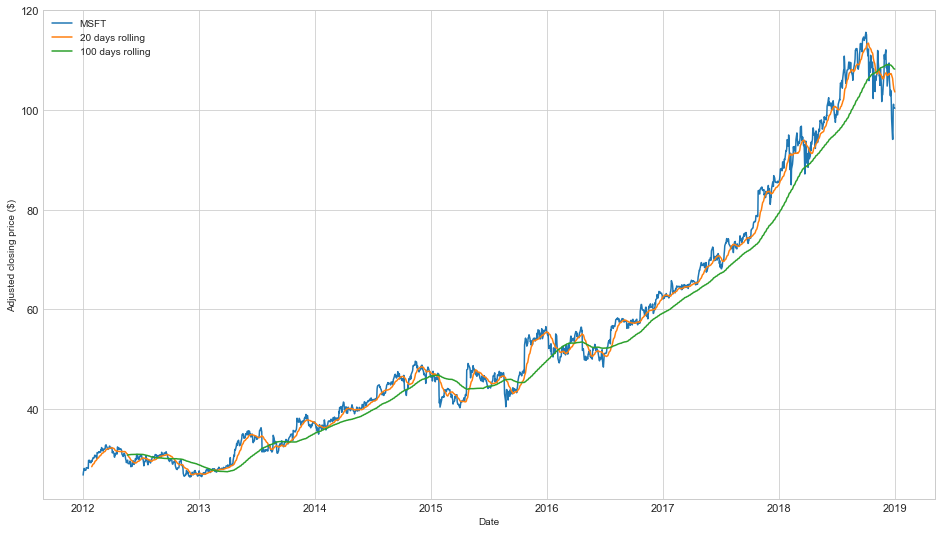

In [96]:
# Get the MSFT timeseries. This now returns a Pandas Series object indexed by date.
msft = close.loc[:, 'MSFT']

# Calculate the 20 and 100 days moving averages of the closing prices
short_rolling_msft = msft.rolling(window=20).mean()
long_rolling_msft = msft.rolling(window=100).mean()

# Plot everything by matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(msft.index, msft, label='MSFT')
ax.plot(short_rolling_msft.index, short_rolling_msft, label='20 days rolling')
ax.plot(long_rolling_msft.index, long_rolling_msft, label='100 days rolling')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

In [130]:
#Modules
#from iexfinance.stocks import get_historical_data
from pandas_datareader import data
from datetime import datetime,timedelta
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.model_selection import cross_validate as cross_validation
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt
from statsmodels.tsa import holtwinters
from statsmodels.tsa import statespace
from statsmodels.tsa.api import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score

In [131]:
#functions

#preparing data using normalisation techinque
def prepare_data(df,forecast_col,forecast_out,test_size):
    label = df[forecast_col].shift(-forecast_out);#creating new column called label 
    X = np.array(df[[forecast_col]]); #creating the feature array
    X = preprocessing.scale(X) #processing the feature array
    X_lately = X[-forecast_out:] #creating the column i want to use later in the predicting method
    X = X[:-forecast_out] # X that will contain the training and testing
    label.dropna(inplace=True); #dropping na values
    y = np.array(label)  # assigning Y
    X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, test_size=test_size) #cross validation 
    response = [X_train,X_test , Y_train, Y_test , X_lately];
    return response;

In [132]:
#Adding predicted values to the dataframe
def adding_predicted(forecast,i):
    global df,dataframe
    df = df.filter(regex='Date|Open')
    df.reset_index(level=0, inplace=True)
    df['symbol'] = i
    for j in range(0,len(forecast)):
        df = df.append({"Date":(datetime.now()+ timedelta(days=(j))).date(),"Open":  forecast[j],"symbol":i}, ignore_index=True)
        dataframe = dataframe.append(df).drop_duplicates()  
    


Enter the number of days to forecast :6
[*********************100%***********************]  1 of 1 downloaded
[1734.50804857 1748.11992641 1722.29587383 1755.17480582 1771.09760288
 1786.38160926] AMZN
[*********************100%***********************]  1 of 1 downloaded
[184.37348612 187.37431579 184.60278539 185.25080509 189.1189842
 190.79386587] FB
[*********************100%***********************]  1 of 1 downloaded
[1178.4617502  1191.92994631 1174.0432537  1171.7228179  1185.46173152
 1200.42854242] GOOGL


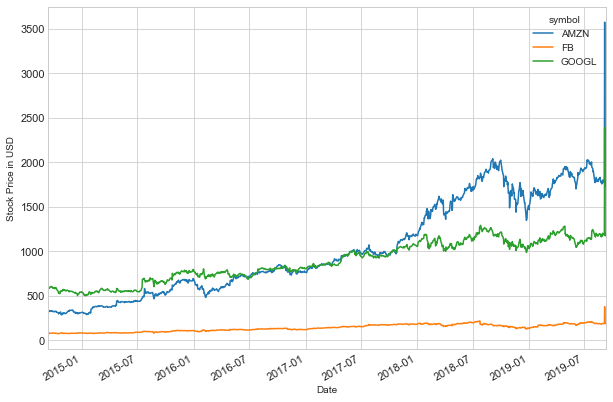

In [136]:
#Algorithm(Classification & Regression)                     
if __name__ == '__main__':
        #initalizing required variables
        startdate = datetime.now() - timedelta(days=(7 * 260))
        forecast_col = 'Open' #choosing which column to forecast
        forecast_out = int(input("Enter the number of days to forecast :")) #how far to forecast 
        test_size = 0.2; #the size of my test set
        dataframe = pd.DataFrame()
        
        #getting stock data from iex module for amazon,facebook and google
        for i in ["AMZN","FB","GOOGL"]:
            df = pd.DataFrame()
            #print (i,startdate,end=datetime.now())
            df = data.DataReader(i, start=startdate, end=datetime.now(), data_source='yahoo')
            #print(df.head(1))       
            #preparing train,test datasets for validating the model
            X_train, X_test, Y_train, Y_test , X_lately =prepare_data(df,forecast_col,forecast_out,test_size); #calling the method were the cross validation and data preperation is in
            
            '''Select which algorithm you want to use from below'''
            #learner = linear_model.LinearRegression() #initializing linear regression model
            #learner = KNeighborsRegressor(n_neighbors=3)
            #learner = DecisionTreeRegressor(max_depth=5)
            #learner = RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100)
            learner = SVR(kernel='linear',degree=1)
            
            #training and predicting values for stocks
            learner.fit(X_train,Y_train); #training the  model
            score=learner.score(X_test,Y_test);#testing the  model
            forecast= learner.predict(X_lately); 
            print(forecast,i)
            adding_predicted(forecast,i)
        
        #ploting data from final dataset
        dataframe['Date'] = pd.to_datetime(dataframe['Date'])
        fig, ax = plt.subplots(figsize=(10,7))
        dataframe.groupby(['Date','symbol']).sum()['Open'].unstack().plot(ax=ax)
        ax.set_xlabel('Date')
        ax.set_ylabel('Stock Price in USD')

In [113]:
df.tail(15)

,Date,Open,symbol
1249,2019-08-29 00:00:00,1186.420000,GOOGL
1250,2019-08-30 00:00:00,1200.350000,GOOGL
1251,2019-09-03 00:00:00,1181.850000,GOOGL
1252,2019-09-04 00:00:00,1179.450000,GOOGL
1253,2019-09-05 00:00:00,1193.660000,GOOGL
1254,2019-09-06,1193.258251,GOOGL
1255,2019-09-07,1194.014452,GOOGL
1256,2019-09-08,1192.396341,GOOGL
1257,2019-09-09,1196.060114,GOOGL
1258,2019-09-10,1195.017510,GOOGL


In [134]:
#Testing Accuracy!
clf = learner.fit(X_train, Y_train)
print('Accuracy of training set: {:.2f}'
     .format(clf.score(X_train, Y_train)))
print('Accuracy of test set: {:.2f}'
     .format(clf.score(X_test, Y_test)))

Accuracy of training set: 0.98
Accuracy of test set: 0.98


Enter the number of days to forecast :10
[*********************100%***********************]  1 of 1 downloaded
[1825.19503534 1825.16514996 1819.50361653 1831.36742493 1825.74433941
 1831.11544281 1831.08555743 1825.424024   1837.2878324  1831.66474688] AMZN
[*********************100%***********************]  1 of 1 downloaded
[188.05563541 188.09396476 188.28183081 188.47912082 188.50584068
 188.49427547 188.53260483 188.72047088 188.91776089 188.94448074] FB
[*********************100%***********************]  1 of 1 downloaded
[1193.25825144 1194.01445185 1192.39634105 1196.06011352 1195.01750988
 1195.67476078 1196.43096119 1194.8128504  1198.47662287 1197.43401923] GOOGL


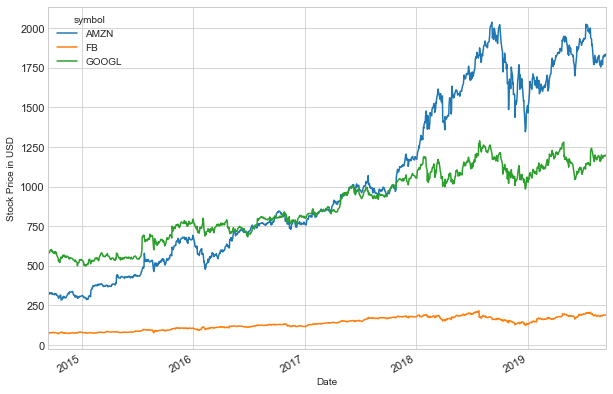

In [110]:
"""Time Series"""
if __name__ == '__main__':
        #initalizing required variables
        startdate = datetime.now() - timedelta(days=(7 * 260))
        forecast_col = 'Open' #choosing which column to forecast
        forecast_out = int(input("Enter the number of days to forecast :")) #how far to forecast 
        test_size = 0.2; #the size of my test set
        dataframe = pd.DataFrame()
        
        #getting stock data from iex module for amazon,facebook and google
        for i in ["AMZN","FB","GOOGL"]:
            df = pd.DataFrame()
            df = data.DataReader(i, start=startdate, end=datetime.now(), data_source='yahoo')
            
            '''Select which algorithm you want to use from below'''
            learner = ExponentialSmoothing(np.asarray(df[forecast_col]) ,seasonal_periods=5 ,trend='add', seasonal='add',).fit()
            #learner = Holt(np.asarray(df.Open)).fit(smoothing_level = 0.3,smoothing_slope = 0.1)           
            forecast = learner.forecast(forecast_out)
            print(forecast,i)
            adding_predicted(forecast,i)
            
        
        #ploting data from final dataset
        dataframe['Date'] = pd.to_datetime(dataframe['Date'])
        fig, ax = plt.subplots(figsize=(10,7))
        dataframe.groupby(['Date','symbol']).sum()[forecast_col].unstack().plot(ax=ax)
        ax.set_xlabel('Date')
        ax.set_ylabel('Stock Price in USD')

In [111]:
#Time series accuracy
X_train, X_test, Y_train, Y_test , X_lately =prepare_data(df,forecast_col,forecast_out,test_size);
print(learner.aic/100)

66.89747331342497


Enter the number of days to forecast :6
[*********************100%***********************]  1 of 1 downloaded
Epoch 1/170
998/998 [==============================] - 1s 732us/step - loss: 1290740.7827
Epoch 2/170
998/998 [==============================] - 0s 213us/step - loss: 279761.5316
Epoch 3/170
998/998 [==============================] - 0s 193us/step - loss: 13868.7582
Epoch 4/170
998/998 [==============================] - 0s 194us/step - loss: 8648.5425
Epoch 5/170
998/998 [==============================] - 0s 196us/step - loss: 6082.7975
Epoch 6/170
998/998 [==============================] - 0s 188us/step - loss: 4640.5113
Epoch 7/170
998/998 [==============================] - 0s 198us/step - loss: 3836.0687
Epoch 8/170
998/998 [==============================] - 0s 195us/step - loss: 3357.0274
Epoch 9/170
998/998 [==============================] - 0s 203us/step - loss: 3157.0710
Epoch 10/170
998/998 [==============================] - 0s 205us/step - loss: 2995.6443
Epoch 11/170


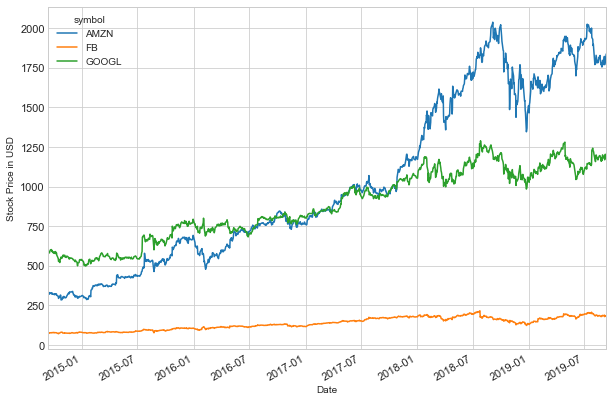

In [82]:
"Neural Network"
from keras.layers import Dense, Activation
from keras.models import Sequential
from functools import reduce


if __name__ == '__main__':
        #initalizing required variables
        startdate = datetime.now() - timedelta(days=(7 * 260))
        forecast_col = 'Open' #choosing which column to forecast
        forecast_out = int(input("Enter the number of days to forecast :")) #how far to forecast 
        test_size = 0.2; #the size of my test set
        dataframe = pd.DataFrame()

        for i in ["AMZN","FB","GOOGL"]:
                df = pd.DataFrame()
                df = data.DataReader(i, start=startdate, end=datetime.now(), data_source='yahoo')
                X_train, X_test, Y_train, Y_test , X_lately =prepare_data(df,forecast_col,forecast_out,test_size)

                # Initialising the ANN
                model = Sequential()
                # Adding the input layer and the first hidden layer
                model.add(Dense(32, activation = 'relu', input_dim = 1))
                # Adding the second hidden layer
                model.add(Dense(units = 32, activation = 'relu'))
                # Adding the third hidden layer
                model.add(Dense(units = 32, activation = 'relu'))
                # Adding the output layer
                model.add(Dense(units = 1))
                #model.add(Dense(1))
                # Compiling the ANN
                model.compile(optimizer = 'adam', loss = 'mean_squared_error')
                # Fitting the ANN to the Training set
                model.fit(X_train, Y_train, batch_size = 5, epochs = 170) #increase epochs value to improve accuracy
                #score = model.score(X_test, Y_test, batch_size = 5, epochs = 170)
                forecast = model.predict(X_lately)
                forecast = reduce(lambda x,y: x+y,forecast.tolist())
                print(forecast,i)
                adding_predicted(forecast,i)
                
                

 #ploting data from final dataset
        dataframe['Date'] = pd.to_datetime(dataframe['Date'])
        fig, ax = plt.subplots(figsize=(10,7))
        dataframe.groupby(['Date','symbol']).sum()[forecast_col].unstack().plot(ax=ax)
        ax.set_xlabel('Date')
        ax.set_ylabel('Stock Price in USD')